### Forecasting procedure

    Choose a Model
    
    Split data into train and test sets
    
    Fit model on training set
    
    Evaluate model on test set
    
    Re-fit model on entire Data Set
    
    Forecast for future Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../Data/airline_passengers.csv',index_col='Month',parse_dates=True)

In [3]:
df

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


In [4]:
df.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [5]:
df.index.freq ='MS'

In [6]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [7]:
## we will try to forecast for next 3 years in future.. i.e till 1963

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 144 entries, 1949-01-01 to 1960-12-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Thousands of Passengers  144 non-null    int64
dtypes: int64(1)
memory usage: 2.2 KB


In [9]:
train_data = df.iloc[:109] #.loc[:"1940-01-01"]
test_data = df.iloc[108:]

In [10]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [11]:
fittedd_model = ExponentialSmoothing(train_data['Thousands of Passengers'],
                                     trend='mul',
                                    seasonal='mul',
                                    seasonal_periods=12).fit()

C:\Users\Arvind\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Arvind\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [12]:
test_predictions = fittedd_model.forecast(36) ## Forecasting for next 3 years

In [13]:
test_predictions

1958-02-01    339.144300
1958-03-01    399.282652
1958-04-01    394.233891
1958-05-01    402.544928
1958-06-01    473.128427
1958-07-01    521.795948
1958-08-01    514.515194
1958-09-01    446.219060
1958-10-01    385.432856
1958-11-01    339.646447
1958-12-01    381.456727
1959-01-01    401.211130
1959-02-01    387.159876
1959-03-01    455.812532
1959-04-01    450.048975
1959-05-01    459.536676
1959-06-01    540.113289
1959-07-01    595.671089
1959-08-01    587.359536
1959-09-01    509.394131
1959-10-01    440.001901
1959-11-01    387.733116
1959-12-01    435.462837
1960-01-01    458.014041
1960-02-01    441.973430
1960-03-01    520.345833
1960-04-01    513.766279
1960-05-01    524.597236
1960-06-01    616.581773
1960-07-01    680.005369
1960-08-01    670.517078
1960-09-01    581.513440
1960-10-01    502.296755
1960-11-01    442.627829
1960-12-01    497.115056
1961-01-01    522.859029
Freq: MS, dtype: float64

Plotting our predictions against our test data

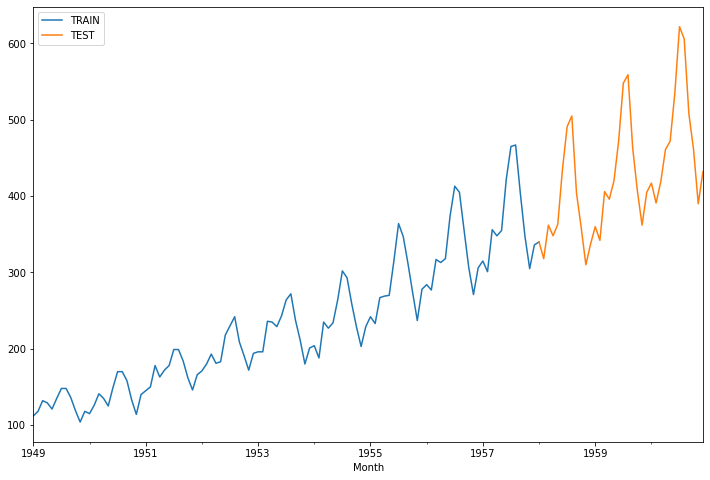

In [14]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))

 Now we want to see how our prediction has performed

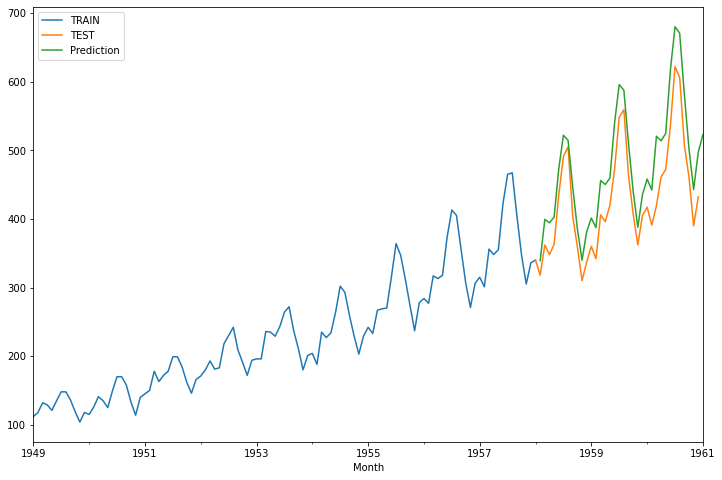

In [15]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))

test_predictions.plot(legend=True,label='Prediction')

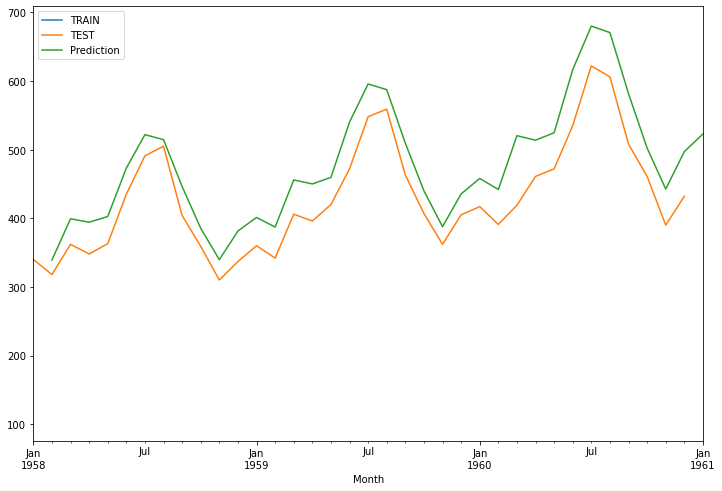

In [16]:
train_data['Thousands of Passengers'].plot(legend=True,label='TRAIN',figsize=(12,8))
test_data['Thousands of Passengers'].plot(legend=True,label='TEST',figsize=(12,8))

## Looking for prediction for specific range
test_predictions.plot(legend=True,label='Prediction',xlim=['1958-01-01','1961-01-01'])

## Evaluating Prediction

Most Common Evaluation Matrix for Time Series are

1. Mean Absolute Error

2. Mean Squared Error

3. Root Mean Square Error

whenever we perform forecast for a continious values on as test set, we have 2 values:

    y - the real value of the test data
    
    y^ (y Hat) -  the predicted value from our forecast

What is acceptable value of RMSE?

Ans: The answer is complicated and totaly depends on your Data

How do we evaluate a forecast for future Dates?

Ans: You Can't. Those Dates haven't happened yet so it is impossible to evaluate your predictions!

In [17]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [21]:
test_data.describe()

,Thousands of Passengers
count,36.000000
mean,428.500000
std,79.329152
min,310.000000
25%,362.000000
50%,412.000000
75%,472.000000
max,622.000000


In [22]:
mean_absolute_error(test_data,test_predictions)

63.03052766640931

In [23]:
mean_squared_error(test_data,test_predictions)

5614.157973695043

In [24]:
np.sqrt(mean_squared_error(test_data,test_predictions))

74.92768496153504

In [25]:
## Forecasting for next years

final_model = ExponentialSmoothing(df['Thousands of Passengers'],trend='mul',seasonal='mul',
                                  seasonal_periods=12).fit()

C:\Users\Arvind\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:725: RuntimeWarning: invalid value encountered in less_equal
  loc = initial_p <= lb
C:\Users\Arvind\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:731: RuntimeWarning: invalid value encountered in greater_equal
  loc = initial_p >= ub


In [26]:
forecast_prediction = final_model.forecast(36)

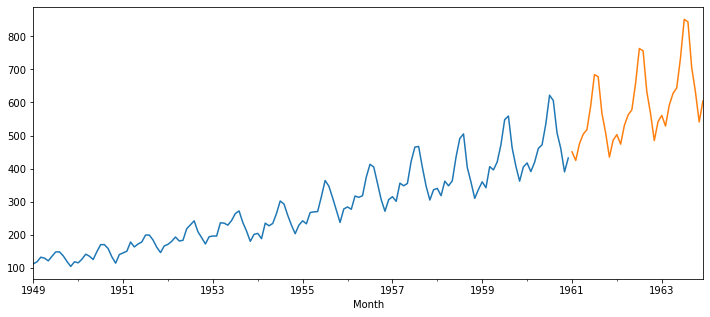

In [27]:
df['Thousands of Passengers'].plot(figsize=(12,5))
forecast_prediction.plot()

In [28]:
df2 = pd.read_csv('../Data/samples.csv',index_col=0,parse_dates=True)

In [29]:
df2.head()

,a,b,c,d
1950-01-01,36,27,0,67
1950-02-01,58,22,3,31
1950-03-01,61,17,5,67
1950-04-01,37,15,8,47
1950-05-01,66,13,8,62


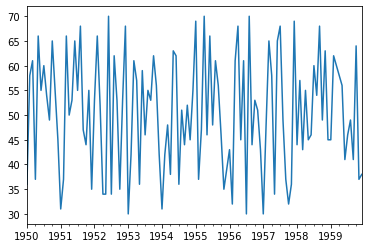

In [31]:
#Stationay Data Example
df2['a'].plot()

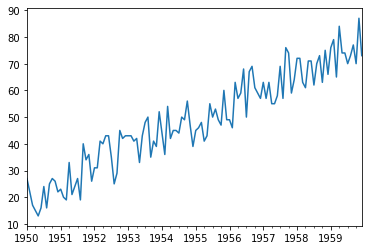

In [32]:
## Non stationary data example
df2['b'].plot()

Differnecing to make time series stationary
Differencing calculates the difference between consecutive points

In [33]:
from statsmodels.tsa.statespace.tools import diff

In [35]:
df2['b']

1950-01-01    27
1950-02-01    22
1950-03-01    17
1950-04-01    15
1950-05-01    13
              ..
1959-08-01    73
1959-09-01    77
1959-10-01    70
1959-11-01    87
1959-12-01    73
Name: b, Length: 120, dtype: int64

In [34]:
df2['b'] - df2['b'].shift(1) ## This is first order difference

1950-01-01     NaN
1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 120, dtype: float64

In [36]:
diff(df2['b'],k_diff=1)  # K_diff = no. order of differnecing

1950-02-01    -5.0
1950-03-01    -5.0
1950-04-01    -2.0
1950-05-01    -2.0
1950-06-01     3.0
              ... 
1959-08-01     3.0
1959-09-01     4.0
1959-10-01    -7.0
1959-11-01    17.0
1959-12-01   -14.0
Name: b, Length: 119, dtype: float64

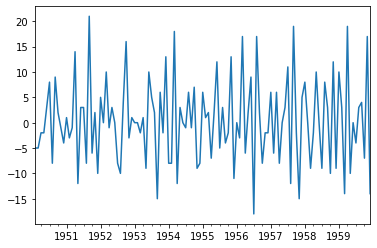

In [37]:
diff(df2['b'],k_diff=1).plot() # by applying first order differncing we are getting stationary time series here.